In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
df=pd.read_csv("seattle-weather.csv")

In [5]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


<AxesSubplot:xlabel='precipitation', ylabel='Count'>

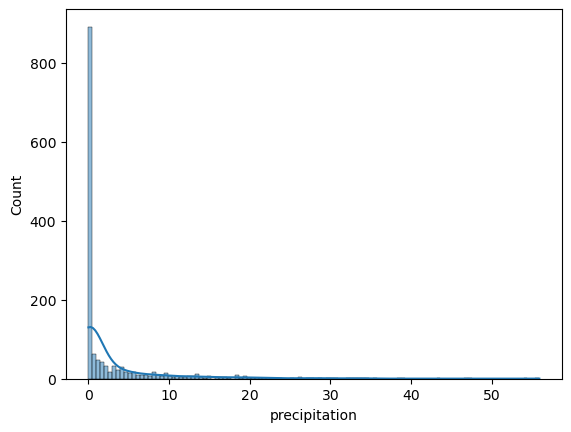

In [6]:
sns.histplot(df['precipitation'], kde=True)

In [7]:
df['precipitation'].describe()


count    1461.000000
mean        3.029432
std         6.680194
min         0.000000
25%         0.000000
50%         0.000000
75%         2.800000
max        55.900000
Name: precipitation, dtype: float64

In [8]:
for col in ['temp_max','temp_min','wind']:
    df[f'{col}_d'] = pd.qcut(df[col], q=4, labels=['low', 'medium', 'high', 'veryhigh'])


In [9]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,temp_max_d,temp_min_d,wind_d
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,medium,medium,veryhigh
1,2012-01-02,10.9,10.6,2.8,4.5,rain,low,low,veryhigh
2,2012-01-03,0.8,11.7,7.2,2.3,rain,medium,medium,medium
3,2012-01-04,20.3,12.2,5.6,4.7,rain,medium,medium,veryhigh
4,2012-01-05,1.3,8.9,2.8,6.1,rain,low,low,veryhigh


In [10]:
df.describe()


,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [11]:
def precipitation_discretizer(value):
    if value<=2.80:
        return 'low'
    elif value>2.80 and value<=6.80:
        return 'medium'
    else:
        return 'high'

In [12]:
df['precipitation_d']=df['precipitation'].apply(precipitation_discretizer)

In [13]:
X=df[['weather','temp_max_d',	'temp_min_d',	'wind_d',	'precipitation_d']]

In [14]:
X.head()

,weather,temp_max_d,temp_min_d,wind_d,precipitation_d
0,drizzle,medium,medium,veryhigh,low
1,rain,low,low,veryhigh,high
2,rain,medium,medium,medium,low
3,rain,medium,medium,veryhigh,high
4,rain,low,low,veryhigh,low


In [15]:
X['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [16]:
X.dtypes

weather              object
temp_max_d         category
temp_min_d         category
wind_d             category
precipitation_d      object
dtype: object

In [17]:
X = X.astype(str)

In [18]:
X.dtypes

weather            object
temp_max_d         object
temp_min_d         object
wind_d             object
precipitation_d    object
dtype: object

In [19]:
X['concat_col']=X['weather']+'_'+ X['precipitation_d']+'_'+ X['wind_d']+'_'+ X['temp_max_d']+ '_'+ X['temp_min_d']  

In [20]:
X

,weather,temp_max_d,temp_min_d,wind_d,precipitation_d,concat_col
0,drizzle,medium,medium,veryhigh,low,drizzle_low_veryhigh_medium_medium
1,rain,low,low,veryhigh,high,rain_high_veryhigh_low_low
2,rain,medium,medium,medium,low,rain_low_medium_medium_medium
3,rain,medium,medium,veryhigh,high,rain_high_veryhigh_medium_medium
4,rain,low,low,veryhigh,low,rain_low_veryhigh_low_low
...,...,...,...,...,...,...
1456,rain,low,low,medium,high,rain_high_medium_low_low
1457,rain,low,low,low,low,rain_low_low_low_low
1458,fog,low,low,medium,low,fog_low_medium_low_low
1459,sun,low,low,high,low,sun_low_high_low_low


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()

In [26]:
le.fit(X['concat_col'].to_list())

LabelEncoder()

In [28]:
le.transform(['drizzle_low_veryhigh_medium_medium'])

array([19])

In [29]:
def label_encoder_output(element):
    return le.transform([element])[0]

In [31]:
X['concat_col_label_encoded']=X['concat_col'].apply(label_encoder_output)
X

,weather,temp_max_d,temp_min_d,wind_d,precipitation_d,concat_col,concat_col_label_encoded
0,drizzle,medium,medium,veryhigh,low,drizzle_low_veryhigh_medium_medium,19
1,rain,low,low,veryhigh,high,rain_high_veryhigh_low_low,76
2,rain,medium,medium,medium,low,rain_low_medium_medium_medium,106
3,rain,medium,medium,veryhigh,high,rain_high_veryhigh_medium_medium,80
4,rain,low,low,veryhigh,low,rain_low_veryhigh_low_low,114
...,...,...,...,...,...,...,...
1456,rain,low,low,medium,high,rain_high_medium_low_low,68
1457,rain,low,low,low,low,rain_low_low_low_low,93
1458,fog,low,low,medium,low,fog_low_medium_low_low,41
1459,sun,low,low,high,low,sun_low_high_low_low,169


In [21]:
!pip install hmmlearn

In [22]:
from hmmlearn.hmm import CategoricalHMM

In [23]:
model = CategoricalHMM(n_components=3)